# Task1

In [1]:
import numpy as np # linear algebra
import pandas as pd
import os

## 1 导入数据

In [2]:
train = pd.read_csv('./train.tsv.zip', sep="\t")
test = pd.read_csv('./test.tsv.zip', sep="\t")
print(train.shape,test.shape)

(156060, 4) (66292, 3)


In [3]:
train.head(30) # 训练集

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [4]:
test.head(50) # 测试集

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [5]:
train['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [6]:
train.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [7]:
y_num = train['Sentiment'].max() + 1

## 2 文本特征表示

### 2.1 Bag-of-Word

In [8]:
words_dic = {} # 词库
dic_length = 0
# 训练集
for i in train.index:
    words = train['Phrase'][i].split(' ')
    for word in words:
        if word not in words_dic.keys():
            words_dic[word] = dic_length
            dic_length += 1
# 测试集            
for i in test.index:
    words = test['Phrase'][i].split(' ')
    for word in words:
        if word not in words_dic.keys():
            words_dic[word] = dic_length
            dic_length += 1
dic_length

21638

In [9]:
# 把x转换成one-hot向量，增广权重向量
def to_X(words, length):
    res = np.zeros((length + 1, 1))
    res[-1] = 1 
    for word in words.split(' '):
        res[words_dic[word]] += 1
    return res

In [10]:
# 把y转换成one-hot向量
def to_y(y):
    y_num = 5
    res = np.zeros((y_num, 1))
    res[y] = 1
    return res

In [11]:
def soft_max(x):
    return np.exp(x) / np.sum(np.exp(x))

交叉熵损失函数:$J(\theta)=-\frac{1}{m}[\Sigma^m_{i=1}(-\Sigma^k_{j=1}I{y^{i}=j}log\frac{e^{\theta^T_jx(i)]}}{\Sigma^k_{l=1}e^{\theta^T_{l=1}x(i)}})$

In [12]:
# 梯度下降求解W
def W_GD(W, lr, Xs, ys, batch_size, T_max = 10000):
    t=0
    shape=W.shape

    while t < T_max: # 达到最大迭代次数后终止
        t += 1
        delta_W = np.zeros(shape)
        
        for n in range(batch_size):
            X = Xs[n]
            y = ys[n]
            delta_y = (y - soft_max(np.dot(W,X))).reshape(y_num,-1)
            delta_W += -np.dot(delta_y,X.reshape(1,-1))
        W -= lr * delta_W / batch_size
#         print(t)

    return W

In [13]:
Xs_val = np.zeros((6060,dic_length+1))
ys_val = np.zeros((6060,y_num))
j = 0
for i in range(150000, 156060):
    Xs_val[j] = to_X(train['Phrase'][i], dic_length).reshape(dic_length+1)
    ys_val[j] = to_y(train['Sentiment'][i]).reshape(y_num)
    j += 1
val_length = j

def validate(W, Xs_val, ys_val, val_length):
    n = 0
    for i in range(val_length):
        y_pre = soft_max(np.dot(W, Xs_val[i])).argmax()
        y = ys_val[i].argmax()
        if y == y_pre:
            n += 1
    return n / val_length

In [14]:
# 初始化W
W = np.zeros((y_num, dic_length+1))
lrs = [0.1,1,10,100]
batch_sizes = [1,10,50,100] # 小于1000
results = []

In [15]:
for lr in lrs:
    for batch_size in batch_sizes:
        iters = 0
        accs = []
        for size in range(1000,150000,1000):
            Xs = np.zeros((1000,dic_length+1))
            ys = np.zeros((1000,y_num))
            j = 0
            for i in range(size-1000, size):
                Xs[j] = to_X(train['Phrase'][i], dic_length).reshape(dic_length+1)
                ys[j] = to_y(train['Sentiment'][i]).reshape(y_num)
                j += 1
            for j in range(0,1000,batch_size):
                W_GD(W, lr, Xs[j : j + batch_size], ys[j : j + batch_size], batch_size)
                iters += 1
                acc = validate(W, Xs_val, ys_val, val_length)
                accs.append(acc)
                acc_length = len(accs)
                if acc_length > 1:
                    if abs(accs[acc_length-1] - accs[acc_length-2]) < 0.01: # 验证集上的准确率不再上升时，停止迭代
                        break
#             print("Val_Accuracy:{}".format(acc))
            if acc_length > 1:
                    if abs(accs[acc_length-1] - accs[acc_length-2]) < 0.01: # 验证集上的准确率不再上升时，停止迭代
                        break
        print("Val_Accuracy:{} Learning_Rate:{} Batch_Size:{} Iterations:{}".format(acc, lr, batch_size, iters))
        results.append(acc)
        iters = 0
        accs = []
        W = np.zeros((y_num, dic_length+1))

Val_Accuracy:0.4909240924092409 Learning_Rate:0.1 Batch_Size:1 Iterations:3
Val_Accuracy:0.4910891089108911 Learning_Rate:0.1 Batch_Size:10 Iterations:2
Val_Accuracy:0.49389438943894387 Learning_Rate:0.1 Batch_Size:50 Iterations:2
Val_Accuracy:0.4882838283828383 Learning_Rate:0.1 Batch_Size:100 Iterations:2
Val_Accuracy:0.49587458745874585 Learning_Rate:1 Batch_Size:1 Iterations:3
Val_Accuracy:0.49587458745874585 Learning_Rate:1 Batch_Size:10 Iterations:2
Val_Accuracy:0.49653465346534653 Learning_Rate:1 Batch_Size:50 Iterations:2
Val_Accuracy:0.47178217821782176 Learning_Rate:1 Batch_Size:100 Iterations:3
Val_Accuracy:0.46023102310231023 Learning_Rate:10 Batch_Size:1 Iterations:3
Val_Accuracy:0.4762376237623762 Learning_Rate:10 Batch_Size:10 Iterations:2
Val_Accuracy:0.49174917491749176 Learning_Rate:10 Batch_Size:50 Iterations:2
Val_Accuracy:0.46105610561056104 Learning_Rate:10 Batch_Size:100 Iterations:3


C:\Users\yinzh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\yinzh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Val_Accuracy:0.05594059405940594 Learning_Rate:100 Batch_Size:1 Iterations:2
Val_Accuracy:0.05594059405940594 Learning_Rate:100 Batch_Size:10 Iterations:2
Val_Accuracy:0.05594059405940594 Learning_Rate:100 Batch_Size:50 Iterations:2
Val_Accuracy:0.05594059405940594 Learning_Rate:100 Batch_Size:100 Iterations:2


RuntimeWarning: overflow encountered in exp

这是因为参数值inx很大时，exp(inx)可能会发生溢出

In [16]:
results

[0.4909240924092409,
 0.4910891089108911,
 0.49389438943894387,
 0.4882838283828383,
 0.49587458745874585,
 0.49587458745874585,
 0.49653465346534653,
 0.47178217821782176,
 0.46023102310231023,
 0.4762376237623762,
 0.49174917491749176,
 0.46105610561056104,
 0.05594059405940594,
 0.05594059405940594,
 0.05594059405940594,
 0.05594059405940594]

In [21]:
pictire_data = {
    "Batch_Size":[1,10,50,100,
                  1,10,50,100,
                  1,10,50,100,
                  1,10,50,100],
    "Learning_Rate":[0.1,0.1,0.1,0.1,
                     1,1,1,1,
                     10,10,10,10,
                     100,100,100,100],
    "Val_Accuracy":results 
}
pictire_data = pd.DataFrame(pictire_data)

In [22]:
pictire_data

,Batch_Size,Learning_Rate,Val_Accuracy
0,1,0.1,0.490924
1,10,0.1,0.491089
2,50,0.1,0.493894
3,100,0.1,0.488284
4,1,1.0,0.495875
5,10,1.0,0.495875
6,50,1.0,0.496535
7,100,1.0,0.471782
8,1,10.0,0.460231
9,10,10.0,0.476238


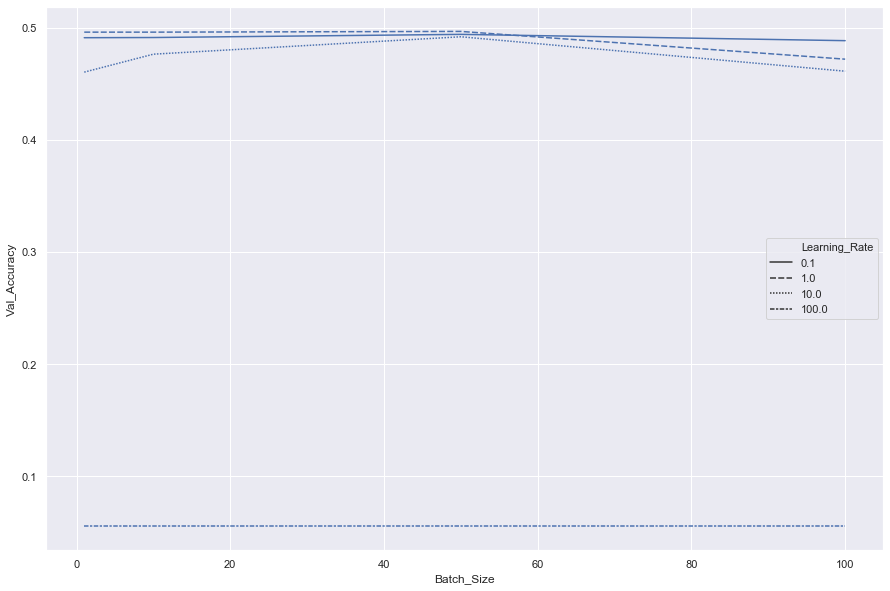

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.figure(figsize=(15, 10))
sns.lineplot(x="Batch_Size", y="Val_Accuracy", style="Learning_Rate", data=pictire_data)
plt.show()

### 2.2 N-gram

使用2-gram进行本文分词，保留语义之间一定的关联。

In [35]:
words_dic = {} # 词库
dic_length = 0
# 训练集
for i in train.index:
    words = train['Phrase'][i].split(' ')
    words_length = len(words)
    for j in range(words_length-1):
        word = words[j] + " " + words[j+1]
        if word not in words_dic.keys():
            words_dic[word] = dic_length
            dic_length += 1
# 测试集            
for i in test.index:
    words = test['Phrase'][i].split(' ')
    words_length = len(words)
    for j in range(words_length-1):
        word = words[j] + " " + words[j+1]
        if word not in words_dic.keys():
            words_dic[word] = dic_length
            dic_length += 1
dic_length

113107

In [38]:
# 把x转换成one-hot向量，增广权重向量
def to_X(words, length):
    res = np.zeros((length + 1, 1))
    res[-1] = 1 
    words = words.split(' ')
    words_length = len(words)
    for j in range(words_length-1):
        word = words[j] + " " + words[j+1]
        res[words_dic[word]] += 1
    return res

In [39]:
Xs_val = np.zeros((100,dic_length+1))
ys_val = np.zeros((100,y_num))
j = 0
for i in range(15000, 15100-1):
    Xs_val[j] = to_X(train['Phrase'][i], dic_length).reshape(dic_length+1)
    ys_val[j] = to_y(train['Sentiment'][i]).reshape(y_num)
    j += 1
val_length = j

In [40]:
# 初始化W
W = np.zeros((y_num, dic_length+1))
lrs = [0.1,1,10,100]
batch_sizes = [1,10,50] # 小于1000
results = []

In [42]:
for lr in lrs:
    for batch_size in batch_sizes:
        iters = 0
        accs = []
        for size in range(100,15000,100):
            Xs = np.zeros((100,dic_length+1))
            ys = np.zeros((100,y_num))
            j = 0
            for i in range(size-100, size):
                Xs[j] = to_X(train['Phrase'][i], dic_length).reshape(dic_length+1)
                ys[j] = to_y(train['Sentiment'][i]).reshape(y_num)
                j += 1
            for j in range(0,100,batch_size):
                W_GD(W, lr, Xs[j : j + batch_size], ys[j : j + batch_size], batch_size)
                iters += 1
                acc = validate(W, Xs_val, ys_val, val_length)
                accs.append(acc)
                acc_length = len(accs)
                if acc_length > 1:
                    if abs(accs[acc_length-1] - accs[acc_length-2]) < 0.01: # 验证集上的准确率不再上升时，停止迭代
                        break
#             print("Val_Accuracy:{}".format(acc))
            if acc_length > 1:
                    if abs(accs[acc_length-1] - accs[acc_length-2]) < 0.01: # 验证集上的准确率不再上升时，停止迭代
                        break
        print("Val_Accuracy:{} Learning_Rate:{} Batch_Size:{} Iterations:{}".format(acc, lr, batch_size, iters))
        results.append(acc)
        iters = 0
        accs = []
        W = np.zeros((y_num, dic_length+1))

Val_Accuracy:0.5454545454545454 Learning_Rate:0.1 Batch_Size:1 Iterations:2
Val_Accuracy:0.5858585858585859 Learning_Rate:0.1 Batch_Size:10 Iterations:2
Val_Accuracy:0.5555555555555556 Learning_Rate:0.1 Batch_Size:50 Iterations:4
Val_Accuracy:0.5858585858585859 Learning_Rate:1 Batch_Size:1 Iterations:3
Val_Accuracy:0.5858585858585859 Learning_Rate:1 Batch_Size:10 Iterations:2
Val_Accuracy:0.5555555555555556 Learning_Rate:1 Batch_Size:50 Iterations:6
Val_Accuracy:0.5858585858585859 Learning_Rate:10 Batch_Size:1 Iterations:3
Val_Accuracy:0.5858585858585859 Learning_Rate:10 Batch_Size:10 Iterations:2
Val_Accuracy:0.5858585858585859 Learning_Rate:10 Batch_Size:50 Iterations:2


C:\Users\yinzh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\yinzh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Val_Accuracy:0.1111111111111111 Learning_Rate:100 Batch_Size:1 Iterations:2
Val_Accuracy:0.1111111111111111 Learning_Rate:100 Batch_Size:10 Iterations:2
Val_Accuracy:0.1111111111111111 Learning_Rate:100 Batch_Size:50 Iterations:2


In [46]:
results

[0.5454545454545454,
 0.5858585858585859,
 0.5555555555555556,
 0.5858585858585859,
 0.5858585858585859,
 0.5555555555555556,
 0.5858585858585859,
 0.5858585858585859,
 0.5858585858585859,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

In [47]:
pictire_data = {
    "Batch_Size":[1,10,50,
                  1,10,50,
                  1,10,50,
                  1,10,50],
    "Learning_Rate":[0.1,0.1,0.1,
                     1,1,1,
                     10,10,10,
                     100,100,100],
    "Val_Accuracy":results 
}
pictire_data = pd.DataFrame(pictire_data)

In [48]:
pictire_data

,Batch_Size,Learning_Rate,Val_Accuracy
0,1,0.1,0.545455
1,10,0.1,0.585859
2,50,0.1,0.555556
3,1,1.0,0.585859
4,10,1.0,0.585859
5,50,1.0,0.555556
6,1,10.0,0.585859
7,10,10.0,0.585859
8,50,10.0,0.585859
9,1,100.0,0.111111


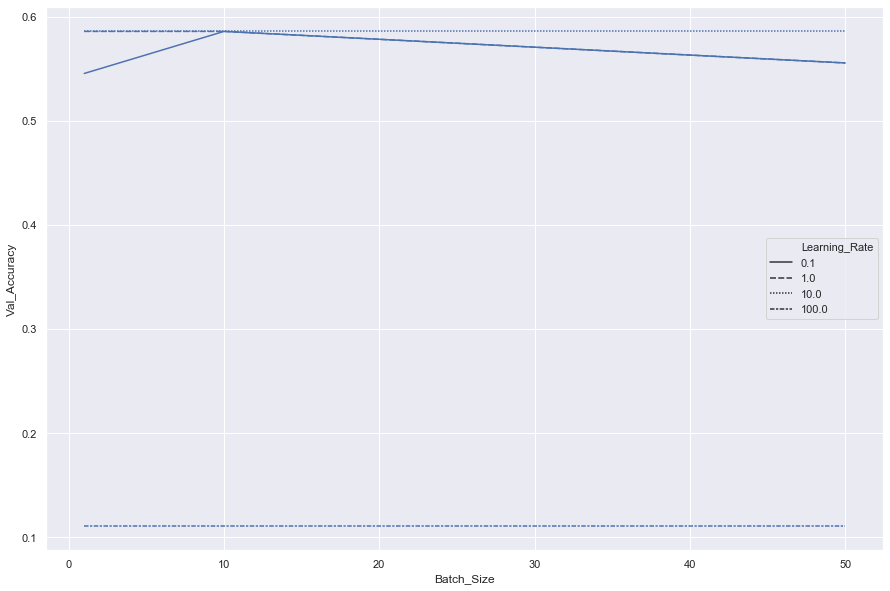

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.figure(figsize=(15, 10))
sns.lineplot(x="Batch_Size", y="Val_Accuracy", style="Learning_Rate", data=pictire_data)
plt.show()